In [159]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Requerimiento
H =3.5 #[m]
Q_litros=2.5 #[L/s]
Q =  Q_litros/1000 #[m3/s]
print("Caudal requerido Q",Q*1000,"L/s")

RPM = 8000
print("RPM",RPM)
n = RPM*np.pi/30 #Rad/s
print("n [rad/s]",n)

Ns = n*Q**(1/2)/((9.81*H)**(3/4))
print("Ns",Ns)

#Cordier
if Ns > 0.85:
    Ds = (8.26/Ns)**0.517
else:
    Ds = (2.5/Ns)**1.092
print("Ds",Ds)    

#Diámetro en m

D = Ds*(Q**0.5)/((9.81*H)**(0.25))
print("D [mm]",D*1000)

#Estimar el ojo mediante Wright

d = D*1.53*(Q/(n*D**3))**(1/3)
print("d ojo [mm]",d*1000)

#Asumiendo b1 igual a d/4

b1 = d/4 #m
print("b1 [mm]",b1*1000)

#Se plantea el triángulo de velocidades a la entrada
U1 = d*n/2 #[m/s]
print("U1 [m/s]",U1)
V1 = Q/(np.pi*d*b1) #[m/s]
print("V1 [m/s]",V1)
W1 = np.sqrt(U1**2+V1**2) #[m/s]
print("W1 [m/s]",W1)
beta1 = np.arctan(V1/U1)*180/np.pi #[grados]
print("Beta 1 [º]",beta1)
alfa1 = 90 #[grados]

#Triángulo de velocidades a la salida
U2 = D*n/(2) #[m/s]
print("U2 [m/s]",U2)
V2_r = V1 #[m/s]
#Se determina b2 a partir del Q, que es el mismo de la entrada
b2 = Q/(np.pi*D*V2_r)
print("b2 [mm]",b2*1000)

#Se estima la eficiencia para usar la ecuación de euler

Caudal requerido Q 2.5 L/s
RPM 8000
n [rad/s] 837.7580409572781
Ns 2.9531521335575697
Ds 1.7019269495106186
D [mm] 35.154154465883956
d ojo [mm] 22.02750112285919
b1 [mm] 5.506875280714797
U1 [m/s] 9.226858093935379
V1 [m/s] 6.560239022563652
W1 [m/s] 11.321291724833687
Beta 1 [º] 35.41259148838003
U2 [m/s] 14.725337788424246
b2 [mm] 3.4505936289012813


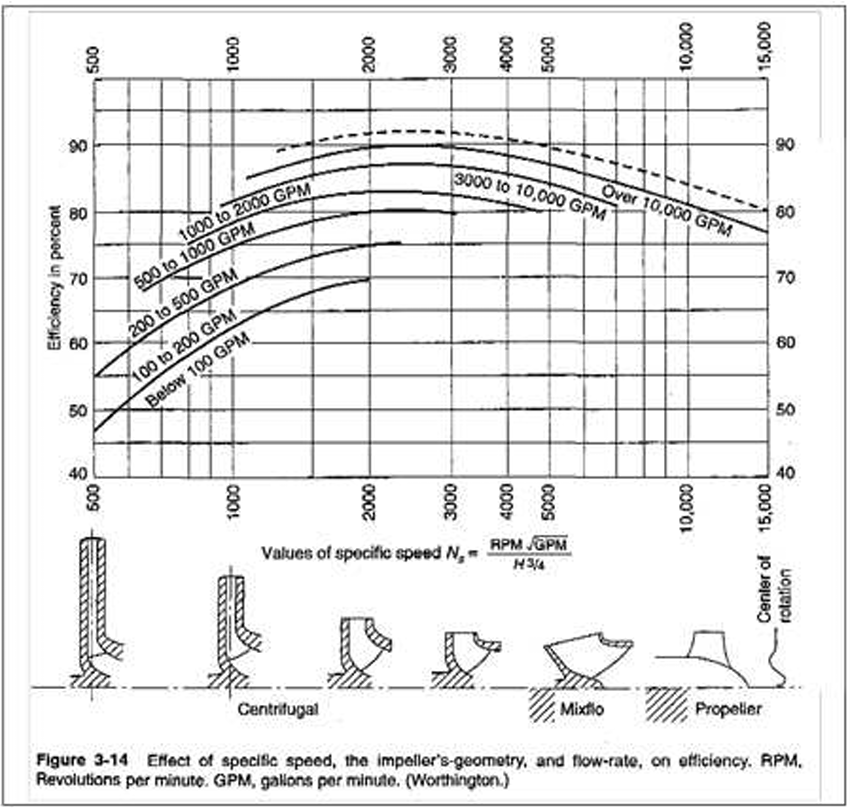

In [160]:
Q_gpm = Q*15850.372483753 #[gpm]
print("Q [gpm]",Q_gpm)
H_ft = 2*3.28084 #[ft]
Nsd = RPM*np.sqrt(Q_gpm)/(H_ft**0.75)
print("Nsd",Nsd)

eta = 0.5 #[Eficiencia de la bomba a partir del diagrama (Nsd y gpm)]

#Número adimensional de cabeza psi

Psi = 2*9.81*H/(eta*U2**2)
print("Psi",Psi)


Q [gpm] 39.6259312093825
Nsd 12283.39569784429
Psi 0.6333831580791587


A partir del número adimensional de cabeza se determina B (lado de la garganta suponiendola cuadrada)
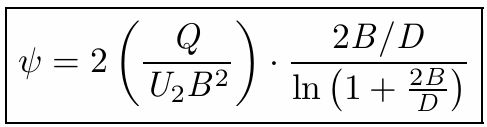

In [161]:
from scipy.optimize import fsolve
from scipy.optimize import root_scalar
f = lambda x: Psi - 2*(Q/(U2*x**2))*(2*x/D)/np.log(1+2*x/D)
# Buscar la raíz en el intervalo positivo [0.001, D] o el que tenga sentido
sol = root_scalar(f, bracket=[0.001, D], method='bisect')

if sol.converged:
    B = sol.root
    print(sol)
    print("B =", B*1000, "mm")

else:
    print("No se encontró una solución.")
#B = 25.4/1000 #[m] Diámetro de la voluta de 1 in
#A_gar = (np.pi/4)*B**2 #[in^2]

A_gar = B**2 #[in^2]
print("Área garganta",A_gar*10**6,"mm^2")
D_voluta = (4*B**2/np.pi)**0.5
print("Diámetro de la salida de la voluta=",D_voluta*39.3701,"in")

print("Psi",Psi)
phi = Q/(U2*B**2)
print("phi",phi)

      converged: True
           flag: converged
 function_calls: 36
     iterations: 34
           root: 0.030384083675081924
         method: bisect
B = 30.384083675081925 mm
Área garganta 923.19254077438 mm^2
Diámetro de la salida de la voluta= 1.3497947064576181 in
Psi 0.6333831580791587
phi 0.1839003077002216


Determinar factor Y
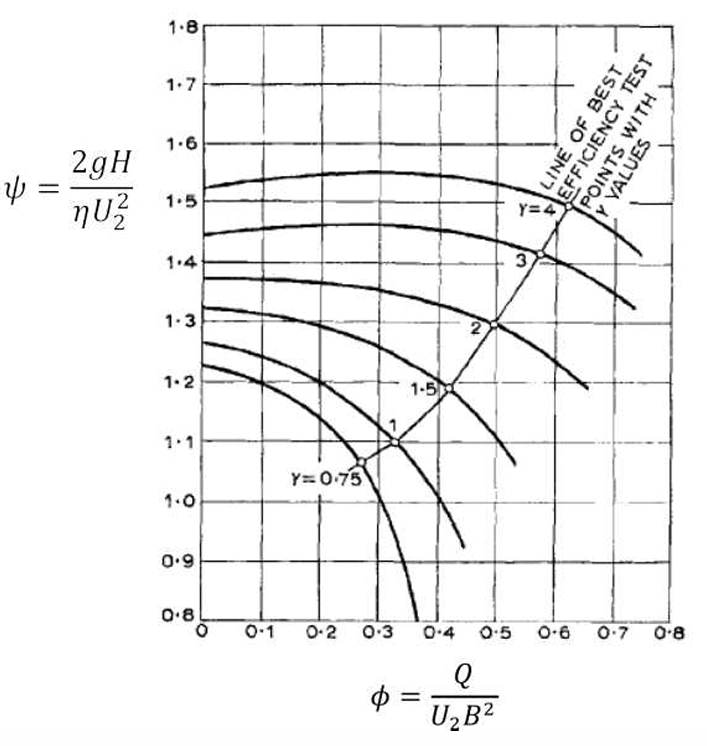

V2 tangencial con desliazamiento 4.663390476107262
V2 con deslizamiento 8.048847542711616
beta 2 geometrica en grados 33.1881887262222
beta 2 real del flujo 33.10374854876895
V2 tangencial sin deslizamiento [m/s] 4.695729824420839
Alfa 2 en grados 54.59262346413517
Diferencia entre velocidades tangenciales con y sin deslizamiento 0.03233934831357743
W2 [m/s] 11.984563902986517
K 0.9978038297811409


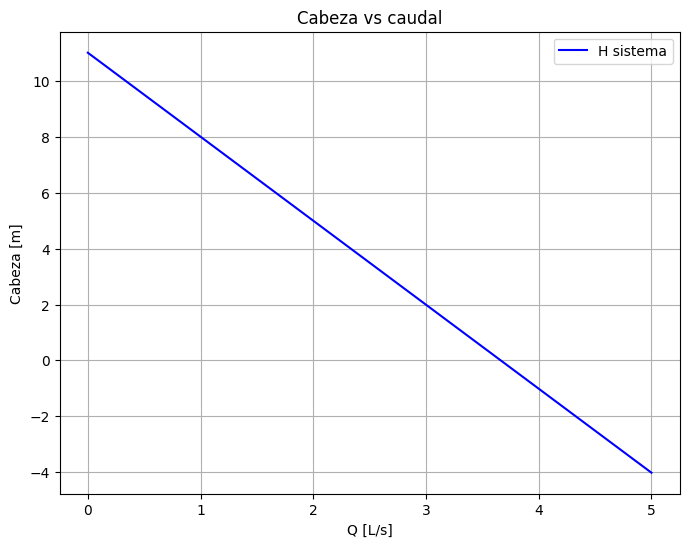

Q estimado inicialmente 2.5 L/s
Rh 0.8427447331109283


In [162]:
Y = 0.27

V2_th_K = 9.81*H/(U2*eta)
print("V2 tangencial con desliazamiento",V2_th_K)
V2 = np.sqrt(V2_r**2+V2_th_K**2)
print("V2 con deslizamiento",V2)


beta2 = np.atan(Y*A_gar/(np.pi*b2*D))*180/np.pi
print("beta 2 geometrica en grados",beta2)

beta2_k = np.atan(V2_r/(U2-V2_th_K))*180/np.pi
print("beta 2 real del flujo",beta2_k)

V2_th = U2 - V2_r/np.tan(beta2*np.pi/180)
print("V2 tangencial sin deslizamiento [m/s]",V2_th)

alfa2 = np.atan(V2_r/V2_th_K)*180/np.pi
print("Alfa 2 en grados",alfa2)

dV_th = V2_th-V2_th_K
print("Diferencia entre velocidades tangenciales con y sin deslizamiento",dV_th)

W2 = V2_r/np.sin(beta2*np.pi/180)
print("W2 [m/s]",W2)

K = 1 - dV_th/U2
print("K",K)

Q_graf_lps = np.linspace(0,5,16) #[L/s]
Q_graf_m3 = Q_graf_lps/(1000) #[m^3/s]
H_graf = (eta*U2**2)/(2*9.81)*(2*K - 2*Q_graf_m3/(np.pi*D*b2*U2*np.tan(beta2*np.pi/180)))

plt.figure(figsize=(8,6))
plt.plot(Q_graf_lps, H_graf, 'b-', label="H sistema")


plt.xlabel("Q [L/s]")
plt.ylabel("Cabeza [m]")
plt.title("Cabeza vs caudal")
plt.legend()
plt.grid(True)
plt.show()

print("Q estimado inicialmente",Q*1000,"L/s")
Rh=1-(V2**2-V1**2)/(2*(U2*V2_th))
print("Rh",Rh)

Constante C de la voluta 0.08253720578887416
Radio de curvatura del alabe [mm] 16.36402447809854
Número de álabes 15.956380958748541


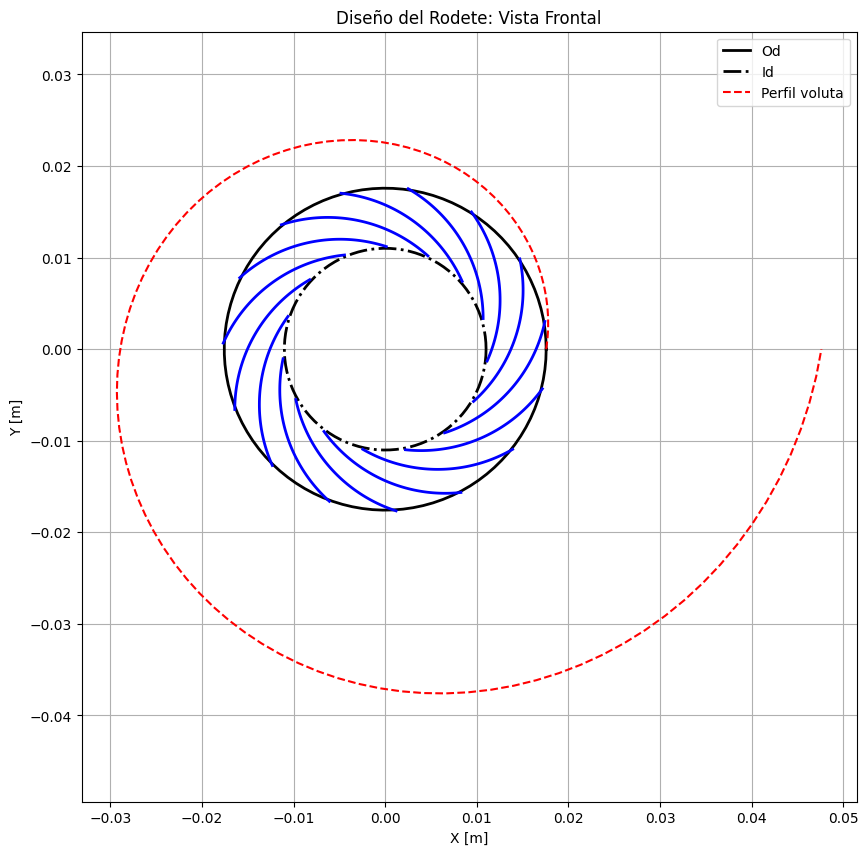

beta 1+beta 2 68.60078021460222
beta 1 35.41259148838003
beta 2 33.1881887262222


In [163]:
#Curva de la voluta
C=V2_th*D/(2) #[m2/s]
print("Constante C de la voluta",C)
tau=2*np.pi*C*B/(Q) #[s]

#Curva del alabe
R_alabe=(D**2-d**2)/(4*(D*np.cos(np.deg2rad(beta2))-d*np.cos(np.deg2rad(beta1)))) #[m]
print("Radio de curvatura del alabe [mm]",R_alabe*1000)
k_z=6.5
N_alabes=k_z*(D+d)/(D-d)*np.sin(0.5*(np.deg2rad(beta1)+np.deg2rad(beta2)))
print("Número de álabes",N_alabes)

import numpy as np
import matplotlib.pyplot as plt

def plot_blade_arc(xc, yc, R, start_angle, end_angle):
    theta = np.linspace(start_angle, end_angle, 100)
    x = xc + R * np.cos(theta)
    y = yc + R * np.sin(theta)
    plt.plot(x, y, 'b-', linewidth=2)

# Geometría del rodete
R = R_alabe  # Radio de curvatura del álabe [in]
d_2 = d/2    # Radio interno [in]
D_2 = D/2    # Radio externo [in]

# Ángulos en radianes
beta1_rad = np.deg2rad(beta1)
beta2_rad = np.deg2rad(beta2)

# Número de álabes
n_blades = int(N_alabes)

plt.figure(figsize=(10, 10))
# Dibujar círculos interno y externo del rodete
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(D_2*np.cos(theta), D_2*np.sin(theta), 'k-', linewidth=2, label='Od')
plt.plot(d_2*np.cos(theta), d_2*np.sin(theta), 'k-.', linewidth=2, label='Id')
plt.plot(D_2*np.exp(theta/tau)*np.cos(theta), D_2*np.exp(theta/tau)*np.sin(theta), 'r--', label='Perfil voluta')

# Dibujar los álabes
for i in range(n_blades):
    # Ángulo de posición del álabe
    angle = i * 2*np.pi/n_blades
    
    # Puntos en el radio interno y externo
    x1 = d_2 * np.cos(angle)  # punto inicial en radio interno
    y1 = d_2 * np.sin(angle)
    
    # Calcular centro del arco (desplazado del origen)
    dx = D_2 * np.cos(beta2_rad) - d_2 * np.cos(beta1_rad)
    dy = D_2 * np.sin(beta2_rad) - d_2 * np.sin(beta1_rad)
    
    # Rotar el centro según la posición del álabe
    cos_rot = np.cos(angle)
    sin_rot = np.sin(angle)
    xc = dx * cos_rot - dy * sin_rot
    yc = dx * sin_rot + dy * cos_rot
    
    # Calcular ángulos inicial y final
    start_angle = angle -np.pi + np.deg2rad(60)
    #start_angle = angle -np.pi + beta1_rad+ beta2_rad
    end_angle = angle - np.deg2rad(60)
    #end_angle = angle - (beta1_rad + beta2_rad)
    # Dibujar el arco
    plot_blade_arc(xc, yc, R, start_angle, end_angle)


plt.axis('equal')
plt.title('Diseño del Rodete: Vista Frontal')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid(True)
plt.legend()
plt.show()

print("beta 1+beta 2",beta1+beta2)
print("beta 1",beta1)
print("beta 2",beta2)
